# **Model Selection**

In [57]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from sklearn.preprocessing import StandardScaler
from category_encoders import CountEncoder, OrdinalEncoder, TargetEncoder

In [58]:
X = pd.read_csv("../artifacts/data_transform/X.csv")
Y = pd.read_csv("../artifacts/data_transform/Y.csv")

In [129]:
X.shape

(48050, 34)

In [59]:
X.head()

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_year,reservation_status_month,reservation_status_day_of_month,reservation_status_weekday,reservation_status_is_weekend
0,Resort Hotel,2.772589,2017.0,May,22.0,30.0,0.0,4.0,2.0,0.0,...,Transient,4.442651,0.0,0.0,Check-Out,2017,6,3,5,1
1,Resort Hotel,5.093750,2016.0,April,17.0,19.0,0.0,3.0,2.0,0.0,...,Transient,4.376511,1.0,0.0,Check-Out,2016,4,22,4,0
2,City Hotel,5.204007,2017.0,July,27.0,7.0,2.0,3.0,2.0,0.0,...,Transient,4.473123,0.0,2.0,Check-Out,2017,7,12,2,0
3,City Hotel,4.094345,2017.0,July,27.0,2.0,2.0,0.0,2.0,0.0,...,Transient,4.578724,0.0,0.0,Check-Out,2017,7,4,1,0
4,City Hotel,4.330733,2016.0,April,16.0,11.0,1.0,3.0,2.0,0.0,...,Transient,4.521245,0.0,1.0,Check-Out,2016,4,15,4,0


In [60]:
Y.value_counts()

is_canceled
0              24025
1              24025
Name: count, dtype: int64

In [61]:
categorical_features = X.select_dtypes("object").columns
numerical_features = X.select_dtypes("number").columns

### **Label Encoding**

#### Checking Cardinality of categorical features

In [62]:
cardinality = {column: X[column].nunique() for column in categorical_features}
cardinality

{'hotel': 2,
 'arrival_date_month': 12,
 'meal': 5,
 'country': 152,
 'market_segment': 8,
 'distribution_channel': 5,
 'reserved_room_type': 10,
 'assigned_room_type': 12,
 'deposit_type': 3,
 'customer_type': 4,
 'reservation_status': 3}

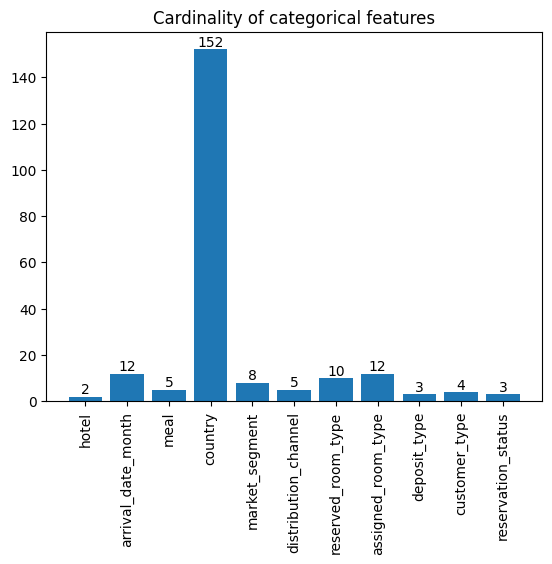

In [63]:
ax = plt.bar(x=cardinality.keys(), height=cardinality.values())
plt.bar_label(ax)
plt.xticks(rotation=90)
plt.title("Cardinality of categorical features")
plt.show()

#### Identify wheather variables `Ordinal` or `Nominal`

In [64]:
for column in categorical_features:
    print(f"Unique values in {column}")
    print(X[column].unique())
    print("*" * 50)

Unique values in hotel
['Resort Hotel' 'City Hotel']
**************************************************
Unique values in arrival_date_month
['May' 'April' 'July' 'August' 'February' 'October' 'January' 'September'
 'March' 'November' 'June' 'December']
**************************************************
Unique values in meal
['BB' 'HB' 'SC' 'Undefined' 'FB']
**************************************************
Unique values in country
['IRL' 'POL' 'CN' 'CHN' 'FRA' 'PRT' 'DEU' 'ESP' 'FIN' 'ITA' 'GBR' 'BEL'
 'USA' 'BRA' 'CHE' 'GAB' 'GRC' 'NLD' 'MEX' 'SWE' 'PAN' 'JPN' 'AUT' 'ZWE'
 'DNK' 'LTU' 'RUS' 'HUN' 'PYF' 'SRB' 'CHL' 'AUS' 'NOR' 'BIH' 'ISR' 'SVN'
 'MAR' 'ROU' 'AGO' 'NZL' 'LUX' 'ZAF' 'TUR' 'BGR' 'LVA' 'TGO' 'URY' 'NGA'
 'SVK' 'PER' 'QAT' 'UKR' 'COL' 'KOR' 'GEO' 'BGD' 'EST' 'UZB' 'PRI' 'CZE'
 'IND' 'ARG' 'HRV' 'IDN' 'CYP' 'KAZ' 'SAU' 'DZA' 'IRQ' 'GTM' 'KWT' 'VEN'
 'AIA' 'IRN' 'LBY' 'ALB' 'SGP' 'MOZ' 'STP' 'OMN' 'TUN' 'TWN' 'JOR' 'DOM'
 'CMR' 'MYS' 'ISL' 'THA' 'BLR' 'PHL' 'JAM' 'CAF' 'CUB'

In [65]:
features_for_count_encoder = ["country"]
features_for_count_encoder

['country']

In [66]:
features_for_traget_encoder = ["assigned_room_type", "reserved_room_type", \
                               "market_segment", "arrival_date_month"]
features_for_traget_encoder

['assigned_room_type',
 'reserved_room_type',
 'market_segment',
 'arrival_date_month']

In [67]:
features_for_ordinal_encoder= ["hotel", "meal", "distribution_channel", "deposit_type", \
                           "customer_type", "reservation_status"]
features_for_ordinal_encoder

['hotel',
 'meal',
 'distribution_channel',
 'deposit_type',
 'customer_type',
 'reservation_status']

In [68]:
count_encoder = CountEncoder()
ordinal_encoder = OrdinalEncoder()
target_encoder = TargetEncoder()

In [69]:
cleaned_x = X.copy(deep=True)

In [70]:
cleaned_x[features_for_count_encoder] = count_encoder.fit_transform(X=X[features_for_count_encoder])

In [71]:
cleaned_x[features_for_ordinal_encoder] = ordinal_encoder.fit_transform(X=X[features_for_ordinal_encoder])

In [72]:
cleaned_x[features_for_traget_encoder] = target_encoder.fit_transform(X=X[features_for_traget_encoder], y=Y)

In [73]:
cleaned_x.head()

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_year,reservation_status_month,reservation_status_day_of_month,reservation_status_weekday,reservation_status_is_weekend
0,1,2.772589,2017.0,0.525613,22.0,30.0,0.0,4.0,2.0,0.0,...,1,4.442651,0.0,0.0,1,2017,6,3,5,1
1,1,5.093750,2016.0,0.528869,17.0,19.0,0.0,3.0,2.0,0.0,...,1,4.376511,1.0,0.0,1,2016,4,22,4,0
2,2,5.204007,2017.0,0.549957,27.0,7.0,2.0,3.0,2.0,0.0,...,1,4.473123,0.0,2.0,1,2017,7,12,2,0
3,2,4.094345,2017.0,0.549957,27.0,2.0,2.0,0.0,2.0,0.0,...,1,4.578724,0.0,0.0,1,2017,7,4,1,0
4,2,4.330733,2016.0,0.528869,16.0,11.0,1.0,3.0,2.0,0.0,...,1,4.521245,0.0,1.0,1,2016,4,15,4,0


### **Scaling**

In [74]:
stander_scaler = StandardScaler()

In [75]:
scaled_x = stander_scaler.fit_transform(cleaned_x)

In [76]:
scaled_x = pd.DataFrame(scaled_x, columns=cleaned_x.columns)

In [77]:
scaled_x.head()

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_year,reservation_status_month,reservation_status_day_of_month,reservation_status_weekday,reservation_status_is_weekend
0,-1.298059,-0.613238,1.113321,0.530392,-0.356712,1.604084,-0.991796,0.621763,0.136685,-0.320855,...,-0.387439,-0.138758,-0.248589,-0.796525,-0.96474,1.199727,-0.030053,-1.449909,1.078802,1.747129
1,-1.298059,0.887731,-0.356405,0.597815,-0.727757,0.360855,-0.991796,0.142440,0.136685,-0.320855,...,-0.387439,-0.226856,3.966193,-0.796525,-0.96474,-0.285137,-0.639867,0.718990,0.575707,-0.572368
2,0.770381,0.959028,1.113321,1.034489,0.014334,-0.995394,0.923360,0.142440,0.136685,-0.320855,...,-0.387439,-0.098169,-0.248589,1.654204,-0.96474,1.199727,0.274854,-0.422536,-0.430484,-0.572368
3,0.770381,0.241470,1.113321,1.034489,0.014334,-1.560498,0.923360,-1.295529,0.136685,-0.320855,...,-0.387439,0.042490,-0.248589,-0.796525,-0.96474,1.199727,0.274854,-1.335756,-0.933580,-0.572368
4,0.770381,0.394329,-0.356405,0.597815,-0.801966,-0.543311,-0.034218,0.142440,0.136685,-0.320855,...,-0.387439,-0.034071,-0.248589,0.428839,-0.96474,-0.285137,-0.639867,-0.080078,0.575707,-0.572368


### **Feature Selection**

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.feature_selection import SelectFromModel

from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

In [79]:
x_train, x_test, y_train, y_test = train_test_split(scaled_x, Y.values.ravel(), test_size=.2, random_state=232, shuffle=True)

In [80]:
x_train

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_year,reservation_status_month,reservation_status_day_of_month,reservation_status_weekday,reservation_status_is_weekend
22438,0.770381,-0.799267,-0.356405,-1.219992,-1.544058,-1.447477,-0.991796,-0.336883,0.136685,1.749491,...,-0.387439,0.228671,-0.248589,1.654204,-0.964740,-0.285137,-1.249681,-1.221604,0.575707,-0.572368
30250,-1.298059,0.466701,-0.356405,1.096693,0.608007,0.925959,-0.034218,0.621763,0.136685,-0.320855,...,-0.387439,0.967265,-0.248589,-0.796525,0.886602,-0.285137,-0.030053,1.518058,-0.430484,-0.572368
24142,-1.298059,-0.037094,-0.356405,-1.774471,1.424307,-0.882374,-0.991796,0.142440,-1.291391,-0.320855,...,-0.387439,-0.905491,-0.248589,-0.796525,0.886602,-0.285137,1.189575,-1.678214,1.078802,1.747129
12896,0.770381,-0.747507,-0.356405,-1.219992,-1.544058,-1.221436,-0.034218,-0.336883,0.136685,-0.320855,...,-0.387439,0.192506,-0.248589,0.428839,-0.964740,-0.285137,-1.249681,-0.879146,-1.436675,-0.572368
6823,0.770381,-0.917164,1.113321,0.597815,-0.950385,-0.882374,-0.991796,-0.816206,0.136685,-0.320855,...,-0.387439,0.246392,-0.248589,2.879569,-0.964740,1.199727,-0.639867,-0.764993,1.581898,1.747129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31988,0.770381,0.331846,1.113321,0.530392,-0.505130,-0.204249,0.923360,-0.816206,-1.291391,-0.320855,...,1.618427,0.216724,-0.248589,-0.796525,2.737944,1.199727,-0.334960,-0.194230,1.581898,1.747129
45761,-1.298059,0.312826,-0.356405,0.530392,-0.579339,-1.108415,0.923360,0.142440,0.136685,-0.320855,...,-0.387439,-0.298390,-0.248589,0.428839,0.886602,-0.285137,-0.944774,-1.335756,0.575707,-0.572368
44781,0.770381,0.726352,1.113321,1.034489,0.236961,1.152000,-0.991796,0.142440,0.136685,-0.320855,...,-0.387439,0.442467,-0.248589,-0.796525,0.886602,1.199727,-0.639867,-1.678214,1.078802,1.747129
35870,0.770381,0.010827,1.113321,0.893475,-0.282503,-0.882374,-0.034218,0.142440,-1.291391,-0.320855,...,-0.387439,0.437393,-0.248589,0.428839,0.886602,1.199727,-0.334960,-1.221604,0.575707,-0.572368


In [81]:
tree_model = DecisionTreeClassifier()

In [82]:
best_features = SelectFromModel(estimator=tree_model, threshold="mean")

In [83]:
best_features.fit_transform(x_train, y_train)

array([[-0.9647398],
       [ 0.886602 ],
       [ 0.886602 ],
       ...,
       [ 0.886602 ],
       [ 0.886602 ],
       [ 0.886602 ]], shape=(38440, 1))

In [84]:
best_features.feature_names_in_

array(['hotel', 'lead_time', 'arrival_date_year', 'arrival_date_month',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults',
       'children', 'babies', 'meal', 'country', 'market_segment',
       'distribution_channel', 'is_repeated_guest',
       'previous_cancellations', 'previous_bookings_not_canceled',
       'reserved_room_type', 'assigned_room_type', 'booking_changes',
       'deposit_type', 'agent', 'days_in_waiting_list', 'customer_type',
       'adr', 'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_year',
       'reservation_status_month', 'reservation_status_day_of_month',
       'reservation_status_weekday', 'reservation_status_is_weekend'],
      dtype=object)

In [85]:
# models = {
#     "random_forest" : random_forest,
#     "xgboost" : xgboost
# }

# cv = KFold(n_splits=5, shuffle=True, random_state=23323)

In [86]:
# # TODO
# model_validation = {}
# for model, estimator in models.items():
#     result = cross_validate(estimator=estimator, X=scaled_x, y=Y.values.ravel(), cv=cv, n_jobs=-1, scoring="accuracy", )
#     model_validation[model] = {"Accuracy" : result}

In [87]:
tree_model.fit(x_train, y_train)

DecisionTreeClassifier()

In [88]:
y_pred = tree_model.predict(x_test)
print(classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4847
           1       1.00      1.00      1.00      4763

    accuracy                           1.00      9610
   macro avg       1.00      1.00      1.00      9610
weighted avg       1.00      1.00      1.00      9610



In [89]:
y_train_pred = tree_model.predict(x_train)

In [90]:
accuracy_score(y_train, y_train_pred)

1.0

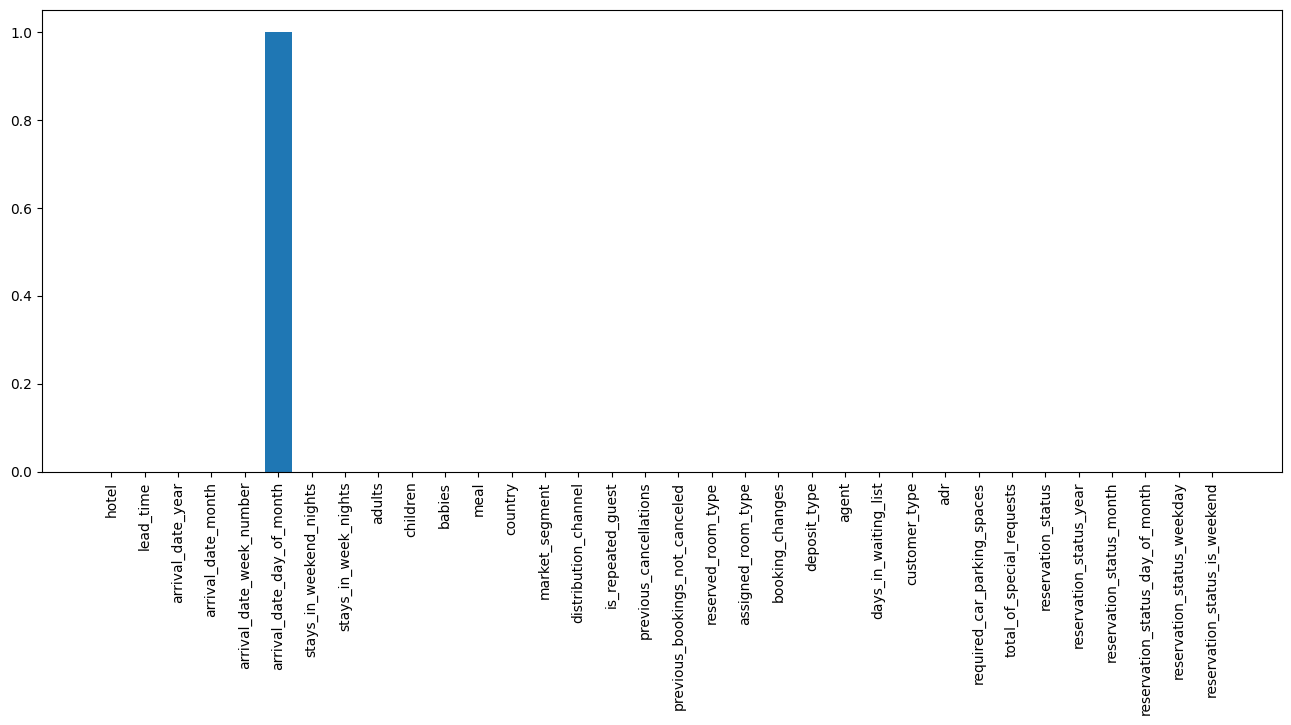

In [91]:
best_features = tree_model.feature_importances_[::-1]

plt.figure(figsize=(16,6))
plt.bar(height=best_features, x=scaled_x.columns)
plt.xticks(rotation=90)
plt.show()

In [92]:
best_15 = np.argsort(best_features)[:15]

In [93]:
best_15

array([ 0,  1,  2,  3,  4,  6,  7,  8, 12,  9, 10, 11, 14, 13, 15])

In [94]:
best_X = scaled_x.iloc[:, best_15]

In [95]:
best_X

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,country,children,babies,meal,distribution_channel,market_segment,is_repeated_guest
0,-1.298059,-0.613238,1.113321,0.530392,-0.356712,-0.991796,0.621763,0.136685,-0.867749,-0.320855,-0.094710,-0.501598,-0.393678,0.702293,-0.179323
1,-1.298059,0.887731,-0.356405,0.597815,-0.727757,-0.991796,0.142440,0.136685,-1.035410,-0.320855,-0.094710,0.850232,-0.393678,-1.420120,-0.179323
2,0.770381,0.959028,1.113321,1.034489,0.014334,0.923360,0.142440,0.136685,-1.011354,-0.320855,-0.094710,-0.501598,1.030201,-1.499984,-0.179323
3,0.770381,0.241470,1.113321,1.034489,0.014334,0.923360,-1.295529,0.136685,-1.010188,-0.320855,-0.094710,-0.501598,-0.393678,0.702293,-0.179323
4,0.770381,0.394329,-0.356405,0.597815,-0.801966,-0.034218,0.142440,0.136685,-0.446555,-0.320855,-0.094710,-0.501598,-0.393678,0.702293,-0.179323
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48045,0.770381,0.538624,-0.356405,1.096693,0.608007,-0.991796,0.621763,0.136685,-0.949975,-0.320855,-0.094710,-0.501598,-0.393678,0.702293,-0.179323
48046,-1.298059,-0.613238,-0.356405,-1.591268,-1.618267,-0.991796,-0.816206,0.136685,1.338377,-0.320855,-0.094710,-0.501598,-0.393678,0.702293,-0.179323
48047,-1.298059,0.627519,1.113321,1.096693,0.459588,0.923360,0.621763,1.564762,-0.327443,1.749491,-0.094710,-0.501598,-0.393678,0.702293,-0.179323
48048,-1.298059,0.667768,1.113321,0.530392,-0.579339,0.923360,1.580410,0.136685,-1.063110,-0.320855,8.916822,-0.501598,-0.393678,0.702293,-0.179323


In [96]:
x_train, x_test, y_train, y_test = train_test_split(best_X, Y.values.ravel(), random_state=121, test_size=.2)

In [97]:
rf_model = DecisionTreeClassifier()
rf_model.fit(x_train, y_train)

DecisionTreeClassifier()

In [98]:
y_pred = rf_model.predict(x_test)

In [99]:
accuracy_score(y_test, y_pred)

0.6839750260145682

In [100]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [112]:
numerical_features

Index(['lead_time', 'arrival_date_year', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes', 'agent',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'reservation_status_year',
       'reservation_status_month', 'reservation_status_day_of_month',
       'reservation_status_weekday', 'reservation_status_is_weekend'],
      dtype='object')

In [118]:
categorical_transformer = ColumnTransformer(transformers=[
    ("ordinal_encoder", Pipeline(steps=[("encoder", OrdinalEncoder()), ("scaler", StandardScaler())]), features_for_ordinal_encoder),
    ("target_encoder", Pipeline(steps=[("encoder", TargetEncoder()), ("scaler", StandardScaler())]), features_for_traget_encoder),
    ("count_encoder", Pipeline(steps=[("encoder", CountEncoder()), ("scaler", StandardScaler())]), features_for_count_encoder),
], remainder="passthrough", verbose_feature_names_out=False, force_int_remainder_cols=False)

In [119]:
numerical_transformer = ColumnTransformer(transformers=[
    ("scaler", StandardScaler(), numerical_features)
],remainder="passthrough", verbose_feature_names_out=False, force_int_remainder_cols=False)

In [123]:
preprocessor = Pipeline(steps=[
    ("categorical", categorical_transformer),
    ("numerical", numerical_transformer)
])

In [128]:
X["hotel"].count()

np.int64(48050)

In [126]:
preprocessor.set_output(transform="pandas")
preprocessor.fit(X,Y)

Pipeline(steps=[('categorical',
                 ColumnTransformer(force_int_remainder_cols=False,
                                   remainder='passthrough',
                                   transformers=[('ordinal_encoder',
                                                  Pipeline(steps=[('encoder',
                                                                   OrdinalEncoder()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['hotel', 'meal',
                                                   'distribution_channel',
                                                   'deposit_type',
                                                   'customer_type',
                                                   'reservation_status']),
                                                 ('target_encoder',
                                                  Pipeline(steps=[('encoder',...
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes', 'agent',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'reservation_status_year',
       'reservation_status_month', 'reservation_status_day_of_month',
       'reservation_status_weekday', 'reservation_status_is_weekend'],
      dtype='object'))],
                                   verbose_feature_names_out=False))])

In [127]:
preprocessor.transform(X)

,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,...,meal,distribution_channel,deposit_type,customer_type,reservation_status,assigned_room_type,reserved_room_type,market_segment,arrival_date_month,country
0,-0.613238,1.113321,-0.356712,1.604084,-0.991796,0.621763,0.136685,-0.320855,-0.094710,-0.179323,...,-0.501598,-0.393678,-0.148951,-0.387439,-0.964740,0.716859,-0.597490,0.702293,0.530392,-0.867749
1,0.887731,-0.356405,-0.727757,0.360855,-0.991796,0.142440,0.136685,-0.320855,-0.094710,-0.179323,...,0.850232,-0.393678,-0.148951,-0.387439,-0.964740,-0.773805,0.997234,-1.420120,0.597815,-1.035410
2,0.959028,1.113321,0.014334,-0.995394,0.923360,0.142440,0.136685,-0.320855,-0.094710,-0.179323,...,-0.501598,1.030201,-0.148951,-0.387439,-0.964740,0.716859,-0.597490,-1.499984,1.034489,-1.011354
3,0.241470,1.113321,0.014334,-1.560498,0.923360,-1.295529,0.136685,-0.320855,-0.094710,-0.179323,...,-0.501598,-0.393678,-0.148951,-0.387439,-0.964740,0.716859,-0.597490,0.702293,1.034489,-1.010188
4,0.394329,-0.356405,-0.801966,-0.543311,-0.034218,0.142440,0.136685,-0.320855,-0.094710,-0.179323,...,-0.501598,-0.393678,-0.148951,-0.387439,-0.964740,0.716859,-0.597490,0.702293,0.597815,-0.446555
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48045,0.538624,-0.356405,0.608007,0.925959,-0.991796,0.621763,0.136685,-0.320855,-0.094710,-0.179323,...,-0.501598,-0.393678,-0.148951,-0.387439,0.886602,-0.773805,0.997234,0.702293,1.096693,-0.949975
48046,-0.613238,-0.356405,-1.618267,1.604084,-0.991796,-0.816206,0.136685,-0.320855,-0.094710,-0.179323,...,-0.501598,-0.393678,-0.148951,-0.387439,0.886602,0.716859,-0.597490,0.702293,-1.591268,1.338377
48047,0.627519,1.113321,0.459588,0.360855,0.923360,0.621763,1.564762,1.749491,-0.094710,-0.179323,...,-0.501598,-0.393678,-0.148951,-0.387439,0.886602,1.214184,4.089201,0.702293,1.096693,-0.327443
48048,0.667768,1.113321,-0.579339,-0.769353,0.923360,1.580410,0.136685,-0.320855,8.916822,-0.179323,...,-0.501598,-0.393678,-0.148951,-0.387439,0.886602,-0.773805,0.997234,0.702293,0.530392,-1.063110
